In [24]:
import numpy as np
import matplotlib.pyplot as plt


# Données
temperatures = [150, 170, 190, 220]
durees_de_vie = [
    [8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064],
    [1764, 2772, 3444, 3542, 3780, 4860, 5196, 5448, 5448, 5448],
    [408, 408, 1344, 1344, 1440, 1680, 1680, 1680, 1680, 1680],
    [408, 408, 504, 504, 504, 528, 528, 528, 528, 528]
]

temperatures_ln = np.log(np.array(temperatures) / 100)

# Initialisation des paramètres
beta0_actuel, beta1_actuel, gamma_actuel = 0, 0, 1
sigma_beta = 10
sigma_gamma = 2

num_iterations = 10000

# Stockage des échantillons
beta0_echantillon, beta1_echantillon, gamma_echantillon = [], [], []

# Algorithme de Metropolis
for _ in range(num_iterations):
    # Proposer un nouvel échantillon
    beta0_propose = np.random.normal(beta0_actuel, sigma_beta)
    beta1_propose = np.random.normal(beta1_actuel, sigma_beta)
    gamma_propose = np.random.exponential(scale=sigma_gamma)

    # Calculer les densités a posteriori
    posterior_actuel = np.prod([1 - np.exp(-(d / np.exp(beta0_actuel + beta1_actuel * x)) ** gamma_actuel) for x, d in zip(temperatures_ln, durees_de_vie)])
    posterior_propose = np.prod([1 - np.exp(-(d / np.exp(beta0_propose + beta1_propose * x)) ** gamma_propose) for x, d in zip(temperatures_ln, durees_de_vie)])

    # Accepter ou rejeter l'échantillon proposé
    acceptance_ratio = posterior_propose / posterior_actuel
    if np.random.uniform(0, 1) < acceptance_ratio:
        beta0_actuel, beta1_actuel, gamma_actuel = beta0_propose, beta1_propose, gamma_propose

    # Stocker les échantillons
    beta0_echantillon.append(beta0_actuel)
    beta1_echantillon.append(beta1_actuel)
    gamma_echantillon.append(gamma_actuel)



<ipython-input-24-53ad397b236e>:35: RuntimeWarning: overflow encountered in power
  posterior_propose = np.prod([1 - np.exp(-(d / np.exp(beta0_propose + beta1_propose * x)) ** gamma_propose) for x, d in zip(temperatures_ln, durees_de_vie)])
<ipython-input-24-53ad397b236e>:34: RuntimeWarning: overflow encountered in power
  posterior_actuel = np.prod([1 - np.exp(-(d / np.exp(beta0_actuel + beta1_actuel * x)) ** gamma_actuel) for x, d in zip(temperatures_ln, durees_de_vie)])
<ipython-input-24-53ad397b236e>:35: RuntimeWarning: overflow encountered in true_divide
  posterior_propose = np.prod([1 - np.exp(-(d / np.exp(beta0_propose + beta1_propose * x)) ** gamma_propose) for x, d in zip(temperatures_ln, durees_de_vie)])
<ipython-input-24-53ad397b236e>:34: RuntimeWarning: overflow encountered in true_divide
  posterior_actuel = np.prod([1 - np.exp(-(d / np.exp(beta0_actuel + beta1_actuel * x)) ** gamma_actuel) for x, d in zip(temperatures_ln, durees_de_vie)])
<ipython-input-24-53ad397b236e>:

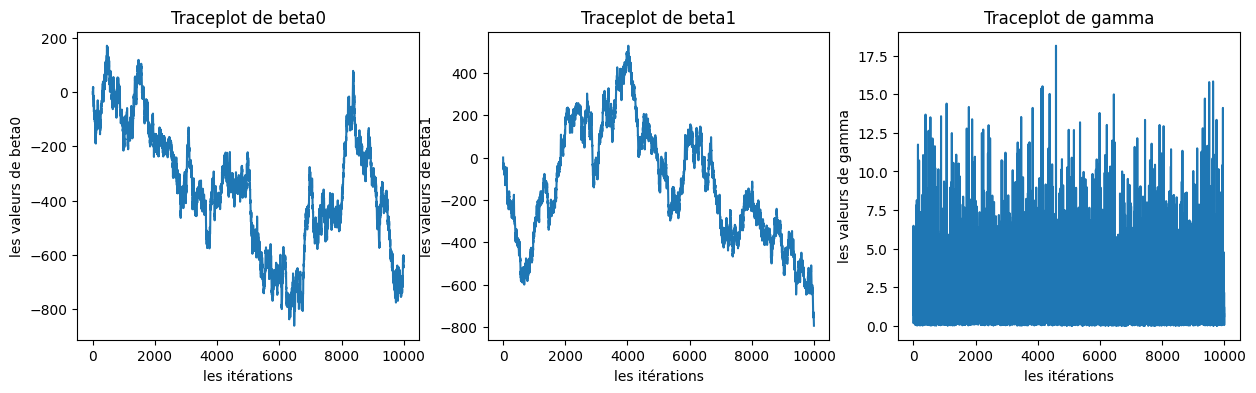

In [32]:
# Affichage de l’évolution des paramètres au cours des itérations
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(beta0_echantillon)
plt.title('Traceplot de beta0')
plt.xlabel('les itérations')
plt.ylabel('les valeurs de beta0')


plt.subplot(1, 3, 2)
plt.plot(beta1_echantillon)
plt.title('Traceplot de beta1')
plt.xlabel('les itérations')
plt.ylabel('les valeurs de beta1')

plt.subplot(1, 3, 3)
plt.plot(gamma_echantillon)
plt.title('Traceplot de gamma')
plt.xlabel('les itérations')
plt.ylabel('les valeurs de gamma')


plt.show()


* **Traceplot de beta0 :**

Ce graphe montre l'évolution de la variable beta0 au fil des itérations de l'algorithme de Metropolis,l'axe horizontal représente les itérations, tandis que l'axe vertical représente les valeurs de beta0,le graphe indique comment la chaîne de Markov explore l'espace des paramètres pour beta0.

on peut observer que la chaîne semble atteindre une certaine stabilité après un certain nombre d'itérations.
Un grapge stationnaire indique une convergence satisfaisante. S'il continue à fluctuer de manière significative, cela peut indiquer des ajustements supplémentaires nécessaires dans le modèle.


* **Traceplot de beta1 :**

De manière similaire au graphe précédent, ce pgraphe représente l'évolution de la variable beta1.
le traceplot de semble converger vers une certaine valeur.
Les fluctuations peuvent indiquer une certaine variabilité dans les échantillons, mais une fois que cela se stabilise, cela peut être considéré comme un bon signe de convergence


* **Traceplot de gamma :**

Ce graphe présente l'évolution de la variable gamma.
on remarque des fluctuations qui peuvent être dues à la nature de l'algorithme de Metropolis, mais une fois stabilisées, elles peuvent fournir une estimation fiable de γ.


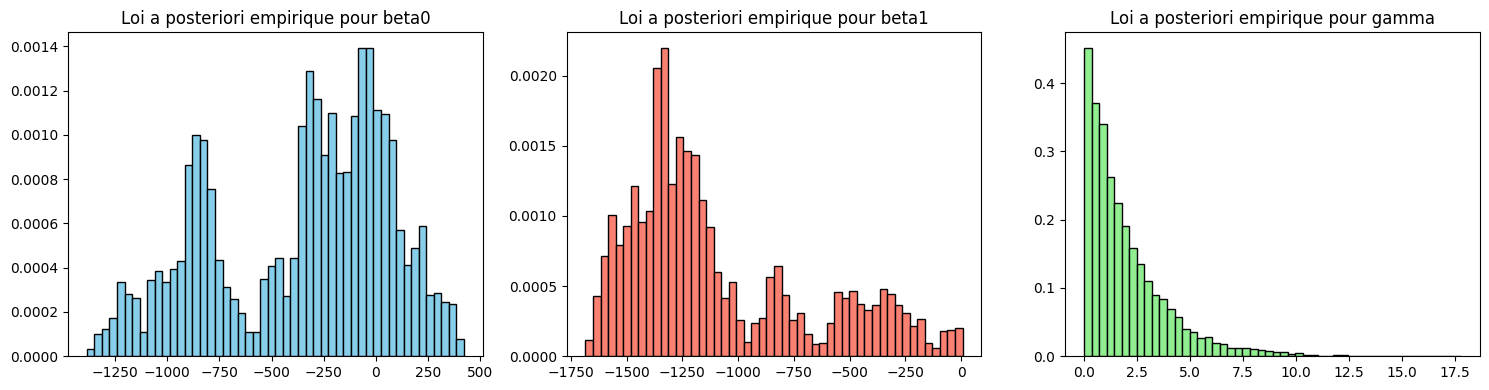

In [26]:
# Affichage d'un histogramme pour la loi a posteriori empirique pour chaque paramètre.
plt.figure(figsize=(15, 4))

# Histogramme pour beta0
plt.subplot(1, 3, 1)
plt.hist(beta0_echantillon, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Loi a posteriori empirique pour beta0')

# Histogramme pour beta1
plt.subplot(1, 3, 2)
plt.hist(beta1_echantillon, bins=50, density=True, color='salmon', edgecolor='black')
plt.title('Loi a posteriori empirique pour beta1')

# Histogramme pour gamma
plt.subplot(1, 3, 3)
plt.hist(gamma_echantillon, bins=50, density=True, color='lightgreen', edgecolor='black')
plt.title('Loi a posteriori empirique pour gamma')

plt.tight_layout()
plt.show()


In [33]:
# on peut faire la prédiction une durée de vie spécifique (130°F) en utilisant les paramètres médianes estimés

median_beta0 = np.median(beta0_echantillon)
median_beta1 = np.median(beta1_echantillon)
median_gamma = np.median(gamma_echantillon)

# Transformation de la température pour la prédiction
temperature_ln_130 = np.log(130 / 100)

theta_prediction = np.exp(median_beta0 + median_beta1 * temperature_ln_130)
theta_prediction = np.exp(median_beta0 + median_beta1 * temperature_ln_130)

# Générer une durée de vie prédite
predicted_duration = np.exp(-np.log(np.random.uniform(0, 1)) / theta_prediction ** median_gamma)

print(f"Durée de vie prédite à 130°F : {predicted_duration:.2f} heures")


Durée de vie prédite à 130°F : inf heures


<ipython-input-33-fcfb666ee8ed>:16: RuntimeWarning: overflow encountered in exp
  predicted_duration = np.exp(-np.log(np.random.uniform(0, 1)) / theta_prediction ** median_gamma)
